In [0]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline


# Read in the Data

In [0]:
banknote = pd.read_csv('https://raw.githubusercontent.com/Kuntal-G/Machine-Learning/master/R-machine-learning/data/banknote-authentication.csv')

In [3]:
banknote.head()

variance    skew  curtosis  entropy  class
0   3.62160  8.6661   -2.8073 -0.44699      0
1   4.54590  8.1674   -2.4586 -1.46210      0
2   3.86600 -2.6383    1.9242  0.10645      0
3   3.45660  9.5228   -4.0112 -3.59440      0
4   0.32924 -4.4552    4.5718 -0.98880      0

In [4]:
banknote.shape

(1372, 5)

In [5]:
banknote.describe()

variance         skew     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


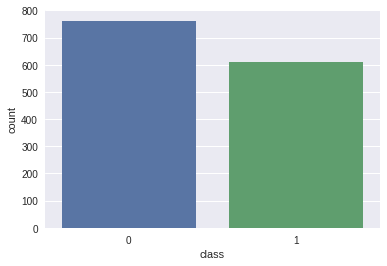

In [6]:
sns.countplot(x ='class', data=banknote)

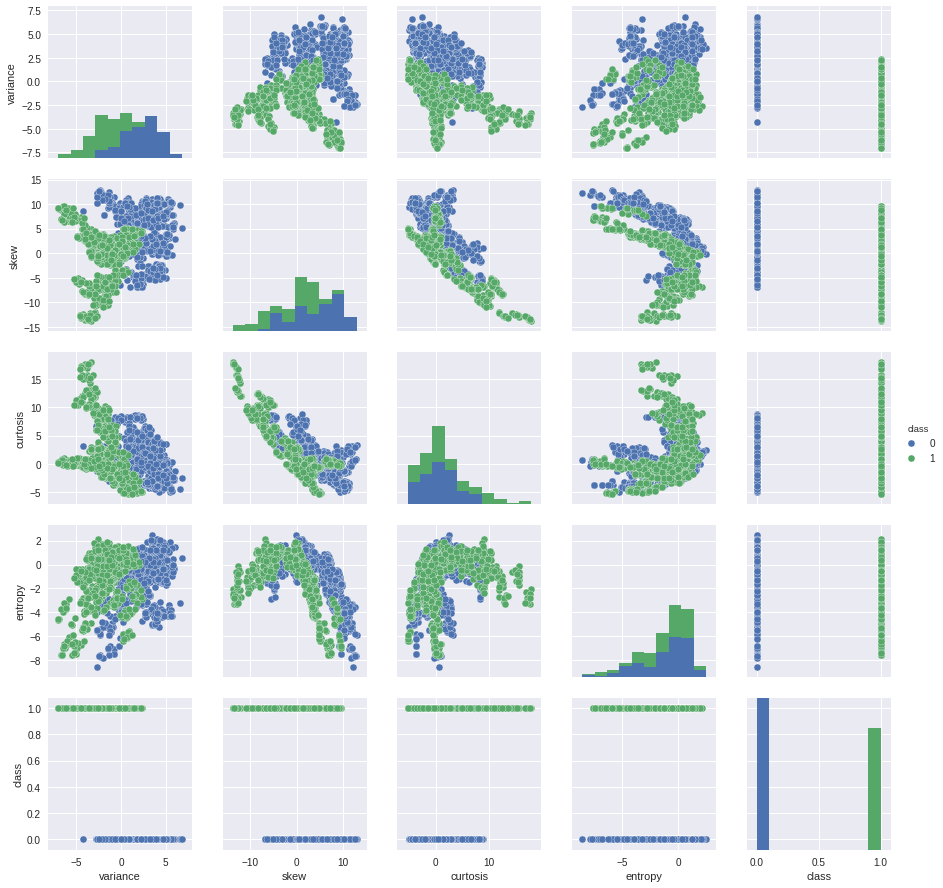

In [7]:
sns.pairplot(data=banknote, hue='class')

In [0]:
banknote_noclass = banknote.drop('class', axis=1)

In [9]:
scaler = StandardScaler()
scaler.fit(banknote_noclass)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
scaled_features = pd.DataFrame(data=scaler.transform(banknote_noclass),columns=banknote_noclass.columns)
scaled_features.head()

variance      skew  curtosis   entropy
0  1.121806  1.149455 -0.975970  0.354561
1  1.447066  1.064453 -0.895036 -0.128767
2  1.207810 -0.777352  0.122218  0.618073
3  1.063742  1.295478 -1.255397 -1.144029
4 -0.036772 -1.087038  0.736730  0.096587

# Train/Test Split

In [0]:
X = scaled_features
y = banknote['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [12]:
 print (X_train.shape, y_train.shape)

(960, 4) (960,)


In [13]:
print (X_test.shape, y_test.shape)

(412, 4) (412,)


# Create Estimator Feature Columns

In [0]:
feat_cols = []

for col in banknote.columns:
  feat_cols.append(tf.feature_column.numeric_column(col))

In [15]:
feat_cols

[_NumericColumn(key='variance', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='skew', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='curtosis', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='entropy', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='class', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

#Create Input Estimator Function

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train,batch_size=10,num_epochs=5,shuffle=True)

#Train Estimator Model

In [0]:
classifier = tf.estimator.DNNClassifier(hidden_units=[10,20,10], n_classes=2, feature_columns=feat_cols)

In [0]:
classifier.train(input_fn=input_func,steps=30)

#Predict with new Test Input Function

In [0]:
pred_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

In [0]:
predictions = list(classifier.predict(input_fn=pred_func))

In [0]:
predcitions

In [0]:
final_preds = []

for pred in predictions:
  final_preds.append(pred['class_ids'][0])

In [0]:
print(classification_report(y_test, final_preds))
print(confusion_matrix(y_test_forged, final_preds))